In [1]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import *
import string
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('data/consumer_reviews.csv')

In [3]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 35358
Number of Columns: 8


In [6]:
pd.DataFrame(df.dtypes, columns=["Data Type"])

,Data Type
helpful,object
rating,float64
review_date,object
site,object
text,object
user,object
verified_buyer,object
verified_reviewer,object


In [99]:
df.head()

,helpful,rating,review_date,site,text,user,verified_buyer,verified_reviewer
0,2 people,5.0,"Original review: May 26, 2019",BookIt.com,Just saved $600. on BookIt vs. another web sit...,"Stuart of Springfield, IL",\n Verified Buyer\n ...,\n Verified Reviewer\n ...
1,8 people,5.0,"Original review: March 28, 2019",BookIt.com,I had a great experience with BookIt. I needed...,"Nichole of Roseville, CA",\n Verified Buyer\n ...,\n Verified Reviewer\n ...
2,7 people,5.0,"Original review: Feb. 10, 2019",BookIt.com,I have had nothing but courteous patient and w...,"Cheryl of Corfu, NY",\n Verified Buyer\n ...,\n Verified Reviewer\n ...
3,4 people,5.0,"Original review: May 22, 2019",BookIt.com,I just want to let you know that I had talked ...,"Lisa of Flushing, MI",\n Verified Buyer\n ...,\n Verified Reviewer\n ...
4,4 people,4.0,"Original review: April 13, 2019",BookIt.com,I called to verify one of the All Inclusive Fe...,"Brandon of Honolulu, HI",\n Verified Buyer\n ...,\n Verified Reviewer\n ...


# Data cleaning

In [7]:
# Fill na with empty string
df['helpful'] = df['helpful'].fillna('')
df['rating'] = df['rating'].fillna('')
df['text'] = df['text'].fillna('')
df['verified_buyer'] = df['verified_buyer'].fillna('')
df['verified_reviewer'] = df['verified_reviewer'].fillna('')

In [8]:
# new data frame with split value columns 
new = df['user'].str.split(", ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df['city']= new[0] 
  
# making separate last name column from new data frame 
df['state']= new[1] 

In [9]:
# Dropping old Name columns 
df.drop(columns =['user'], inplace = True) 

In [10]:
# Remove 'helpful' 
df['helpful'] = df['helpful'].apply(lambda x: re.sub('(\w)+$','',x))

In [11]:
# \S+ means anything that is not an empty space
df['verified_buyer'] = df['verified_buyer'].apply(lambda x: re.sub('\n\S*', '', x))
df['verified_reviewer'] = df['verified_reviewer'].apply(lambda x: re.sub('\n\S*', '', x))

# \s+ means all empty space (\n, \r, \t)
df['verified_buyer'] = df['verified_buyer'].apply(lambda x: re.sub('\s+', '', x))
df['verified_reviewer'] = df['verified_reviewer'].apply(lambda x: re.sub('\s+', '', x))

#Date selection from ['review_date']
df['review_date'] = df['review_date'].apply(lambda x: re.sub('(Original review:)+', '',x))

In [12]:
# Clean 'review_date'
df['review_date'] = df.review_date.map(lambda x: x.replace(',',''))
df['review_date'] = df['review_date'].str.replace('[^\w\s]','')
df['review_date'] = df['review_date'].str.replace('March', 'Mar')
df['review_date'] = df['review_date'].str.replace('April', 'Apr')
df['review_date'] = df['review_date'].str.replace('June', 'Jun')
df['review_date'] = df['review_date'].str.replace('July', 'Jul')
df['review_date'] = df['review_date'].str.replace('Sept', 'Sep')
df['review_date'] = df['review_date'].str.strip('Resolution response ')

In [13]:
# Convert 'review_date' data type
df['review_date'] = pd.to_datetime(df['review_date'])

In [17]:
df['helpful']

0        2 
1        8 
2        7 
3        4 
4        4 
         ..
35353      
35354    4 
35355    2 
35356      
35357    2 
Name: helpful, Length: 35358, dtype: object

In [20]:
# Convert 'helpful' and 'rating' data type
df['helpful'] = df['helpful'].apply(pd.to_numeric, downcast='float', errors='coerce')
df['rating'] = df['rating'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [21]:
#travel sites: 
#'BookIt.com', 'CheapOair', 'Expedia', 'Priceline','Booking.com', 'Hotels.com','Travelocity', 'Hotwire',
#'Orbitz', 'OneTravel', 'TripAdvisor', 'Airbnb', 'CheapTickets', 'trivago', 'KAYAK', 'Travelzoo', 'Hipmunk', 
#'Jetsetter'

BookIt = df.loc[df.loc[:,'site']=='BookIt.com',:]
CheapOair = df.loc[df.loc[:,'site']=='CheapOair',:] 
Expedia = df.loc[df.loc[:,'site']=='Expedia',:]
Priceline = df.loc[df.loc[:,'site']=='Priceline',:]
Booking = df.loc[df.loc[:,'site']=='Booking.com',:]
Hotels = df.loc[df.loc[:,'site']=='Hotels.com',:]
Travelocity = df.loc[df.loc[:,'site']=='Travelocity',:]
Hotwire = df.loc[df.loc[:,'site']=='Hotwire',:]
Orbitz = df.loc[df.loc[:,'site']=='Orbitz',:]
OneTravel = df.loc[df.loc[:,'site']=='OneTravel',:]
TripAdvisor = df.loc[df.loc[:,'site']=='TripAdvisor',:]
Airbnb = df.loc[df.loc[:,'site']=='Airbnb',:]
CheapTickets = df.loc[df.loc[:,'site']=='CheapTickets',:]
trivago = df.loc[df.loc[:,'site']=='trivago',:]
KAYAK = df.loc[df.loc[:,'site']=='KAYAK',:]
Travelzoo = df.loc[df.loc[:,'site']=='Travelzoo',:]
Hipmunk = df.loc[df.loc[:,'site']=='Hipmunk',:]

In [22]:
#Intermediate df
df.head()

,helpful,rating,review_date,site,text,verified_buyer,verified_reviewer,city,state
0,2.0,5.0,2019-05-26,BookIt.com,Just saved $600. on BookIt vs. another web sit...,VerifiedBuyer,VerifiedReviewer,Stuart of Springfield,IL
1,8.0,5.0,2019-03-28,BookIt.com,I had a great experience with BookIt. I needed...,VerifiedBuyer,VerifiedReviewer,Nichole of Roseville,CA
2,7.0,5.0,2019-02-10,BookIt.com,I have had nothing but courteous patient and w...,VerifiedBuyer,VerifiedReviewer,Cheryl of Corfu,NY
3,4.0,5.0,2019-05-22,BookIt.com,I just want to let you know that I had talked ...,VerifiedBuyer,VerifiedReviewer,Lisa of Flushing,MI
4,4.0,4.0,2019-04-13,BookIt.com,I called to verify one of the All Inclusive Fe...,VerifiedBuyer,VerifiedReviewer,Brandon of Honolulu,HI


- A **Verified Buyer** has purchased the reviewed product or service and provided proof of purchase history to ConsumerAffairs. This specification is intended to identify those members of our community who are submitting reviews of products that they own or services they've received. Any proof of purchase information submitted to ConsumerAffairs will not be displayed on our site or used for any other purpose.


- A **Verified Reviewer** has created an account on ConsumerAffairs and confirmed his/her email address through our verification process, has logged in through a social media site like Facebook or Twitter that has confirmed the reviewer's identity, or has been identified by a company that has provided ConsumerAffairs with valid contact information for the reviewer. Verification ensures reviews are written by credible members of the ConsumerAffairs community.

In [23]:
#Initial review counts per site
review_count = pd.DataFrame(df.site.value_counts()).reset_index()
review_count.columns = ['site','frequency']
review_count

,site,frequency
0,BookIt.com,7446
1,CheapOair,6294
2,Expedia,4507
3,Priceline,3675
4,Booking.com,3281
5,Hotels.com,2562
6,Travelocity,1432
7,Hotwire,1419
8,Orbitz,1133
9,OneTravel,1014


Text(0, 0.5, 'Site')

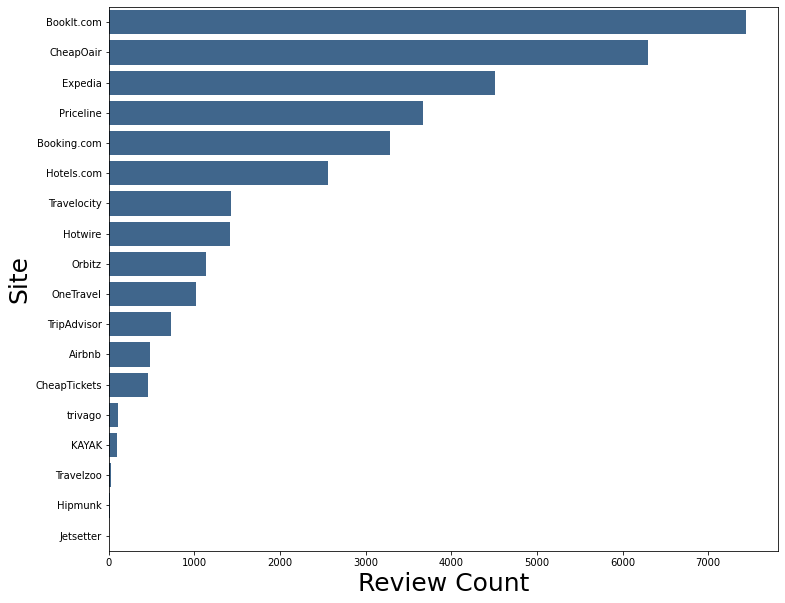

In [24]:
plt.figure(figsize=(12, 10))
g1 = sns.barplot(x=df.site.value_counts(), y=df.site.value_counts().index, color = (0.2, 0.4, 0.6, 0.6))
#ax.set(xlabel='Counts', ylabel='State')
g1.set_xlabel("Review Count",fontsize=25)
g1.set_ylabel("Site",fontsize=25)


# Initial analysis 

In [25]:
# Overall rating and helpful relationship
df.groupby('rating').describe()

helpful                                               
          count      mean       std  min  25%  50%  75%    max
rating                                                        
1.0     14319.0  5.275927  3.974661  2.0  3.0  4.0  6.0   49.0
2.0       590.0  5.194915  4.795758  2.0  2.0  4.0  6.0   72.0
3.0       146.0  4.561644  5.755924  2.0  2.0  3.0  5.0   61.0
4.0       136.0  3.860294  5.959335  2.0  2.0  3.0  4.0   67.0
5.0       371.0  4.439353  8.529026  2.0  2.0  3.0  4.0  115.0

In [26]:
# Total  of 'helpful' in df
df['helpful'].count()

16574

<Figure size 1440x1296 with 0 Axes>

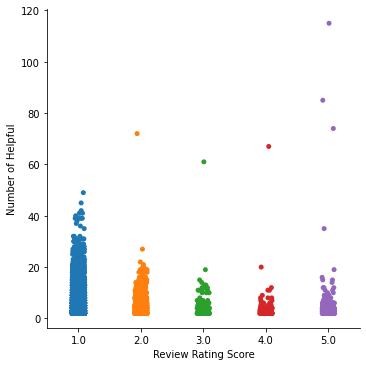

In [27]:
# No. of 'helpful' per rating

plt.figure(figsize=(20, 18))
g2 = sns.catplot(x="rating", y="helpful", data=df)
g2.set(xlabel='Review Rating Score', ylabel='Number of Helpful')


In [28]:
# Review word count vs. Rating
df['review_length'] = df['text'].apply(lambda x: len(x) - x.count(' '))

In [29]:
df.groupby('rating').describe()

helpful                                                review_length  \
          count      mean       std  min  25%  50%  75%    max         count   
rating                                                                         
1.0     14319.0  5.275927  3.974661  2.0  3.0  4.0  6.0   49.0       20400.0   
2.0       590.0  5.194915  4.795758  2.0  2.0  4.0  6.0   72.0        1304.0   
3.0       146.0  4.561644  5.755924  2.0  2.0  3.0  5.0   61.0         784.0   
4.0       136.0  3.860294  5.959335  2.0  2.0  3.0  4.0   67.0        1624.0   
5.0       371.0  4.439353  8.529026  2.0  2.0  3.0  4.0  115.0        7361.0   

                                                                     
              mean         std   min     25%    50%     75%     max  
rating                                                               
1.0     475.195000  167.823433   0.0  354.00  474.0  598.00  1117.0  
2.0     430.934816  183.775021   0.0  278.00  428.0  568.00  1084.0  
3.0     315.207908  178.896544   9.0  192.75  267.0  420.75  1075.0  
4.0     229.695197  145.943427  10.0  142.00  208.0  278.00   816.0  
5.0     211.196984  123.951551  10.0  137.00  205.0  252.00  1010.0

<Figure size 1440x1296 with 0 Axes>

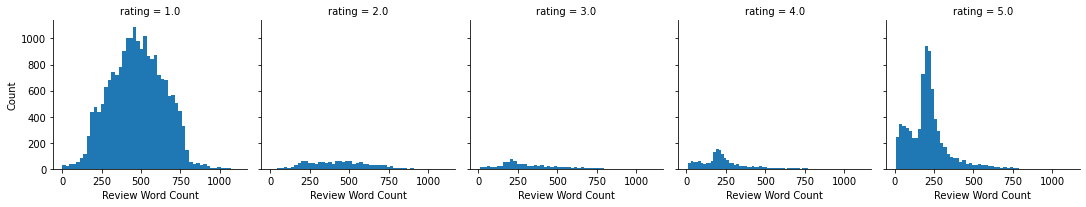

In [30]:
#Review length vs. Rating
plt.figure(figsize = (20,18))
hist = sns.FacetGrid(data=df, col='rating', palette = "Set3")
hist = hist.map(plt.hist, 'review_length', bins=50)
hist.set_axis_labels("Review Word Count", "Count")


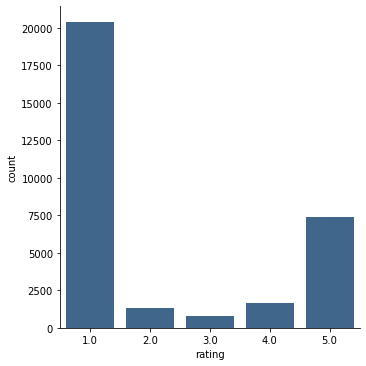

In [31]:
# Overall 'rating' distribution
sns.catplot(x="rating", kind="count", data=df, color = (0.2, 0.4, 0.6, 0.6))

C:\Users\KitaeKim\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


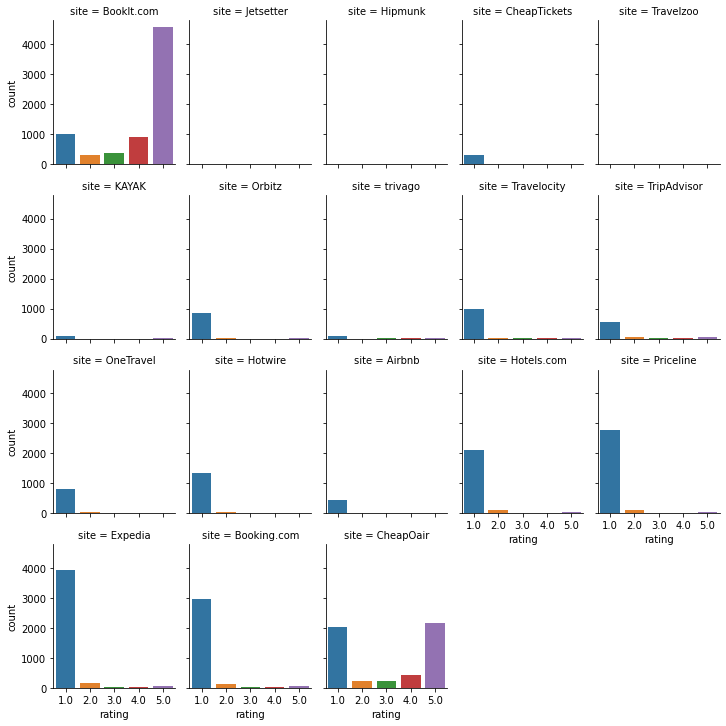

In [32]:
# 'rating' distribution per site
g3 = sns.catplot("rating", col="site", col_wrap=5,
           data=df, kind="count", height=2.5, aspect=.8)

In [33]:
# average 'rating' per site
group = df.groupby('site').agg(['mean'])['rating']
group = group.reset_index()
#group.sort_values(by ='rating mean')
group = group.sort_values(by = 'mean', ascending = False)
group

,site,mean
6,Hipmunk,4.333333
1,BookIt.com,4.086067
9,Jetsetter,3.875000
15,Travelzoo,3.343750
3,CheapOair,3.084242
17,trivago,1.981982
16,TripAdvisor,1.570827
10,KAYAK,1.484536
0,Airbnb,1.281250
11,OneTravel,1.196231


Text(0, 0.5, 'Site')

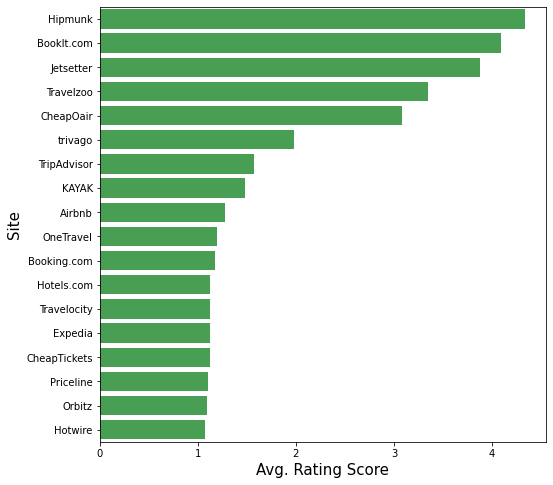

In [34]:
plt.figure(figsize=(8, 8))
g4 = sns.barplot(x='mean', y='site', data =  group, color = sns.xkcd_rgb["medium green"])
#ax.set(xlabel='Counts', ylabel='State')
g4.set_xlabel("Avg. Rating Score",fontsize=15)
g4.set_ylabel("Site",fontsize=15)



# No. of reviews by Country (US and Canada)

In [35]:
us_state = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", 
          "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
          "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

df_us = df.loc[df.state.isin(us_state)]

ca_state = ["AB", "BC", "MB", "NB", "NL", "NT", "NS", "NU", "ON", "PE", "QC", "SK", "YT"]

df_ca = df.loc[df.state.isin(ca_state)]

In [36]:
x = df_us['state'].value_counts()
y = x.to_dict()

In [43]:
df_us.groupby('state')['state'].transform(pd.Series)

0        IL
1        CA
2        NY
3        MI
4        HI
         ..
35351    NY
35352    NY
35354    MD
35355    MD
35357    NJ
Name: state, Length: 29456, dtype: object

Text(0, 0.5, 'State')

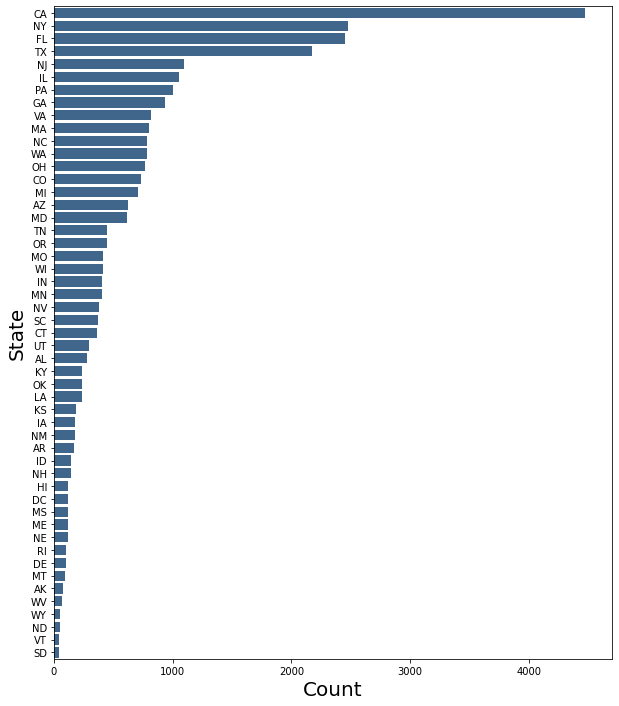

In [44]:
# No. of reviews by US State

plt.figure(figsize=(10, 12))
g5 = sns.barplot(x=df_us.state.value_counts(), y=df_us.state.value_counts().index, color = (0.2, 0.4, 0.6, 0.6))
#ax.set(xlabel='Counts', ylabel='State')
g5.set_xlabel("Count",fontsize=20)
g5.set_ylabel("State",fontsize=20)

In [45]:
df_us1 = df_us.groupby(['state', 'site']).size().reset_index(name = 'Count')

state_site_list = []
for x in us_state:
    top5_site = df_us1[df_us1['state'] == x].sort_values(by='Count', ascending =False).head(5)
    state_site_list.append(top5_site)
    
top5_site_all = pd.concat(state_site_list)
top5_site_all[top5_site_all['state'] == 'NJ']


,state,site,Count
445,NJ,BookIt.com,349
447,NJ,CheapOair,180
449,NJ,Expedia,143
456,NJ,Priceline,88
446,NJ,Booking.com,65


[Text(0.5, 0, 'Counts'), Text(0, 0.5, 'State')]

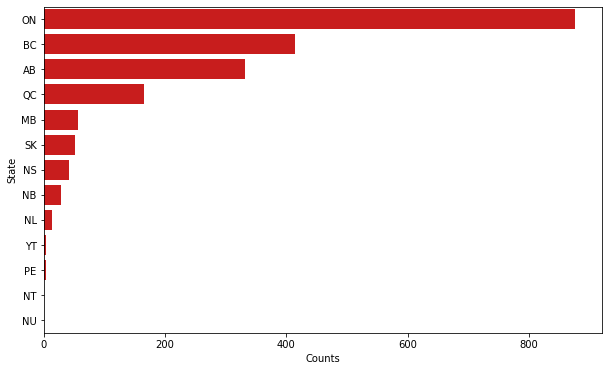

In [47]:
# No. of Review by Canadian State
plt.figure(figsize=(10,6))
g6 = sns.barplot(x=df_ca.state.value_counts(), y=df_ca.state.value_counts().index, color = sns.xkcd_rgb["red"])
g6.set(xlabel='Counts', ylabel='State')

In [48]:
df_ca1 = df_ca.groupby(['state', 'site']).size().reset_index(name = 'Count')

castate_site_list = []
for x in ca_state:
    catop5_site = df_ca1[df_ca1['state'] == x].sort_values(by='Count', ascending =False).head(5)
    castate_site_list.append(catop5_site)
    
catop5_site_all = pd.concat(castate_site_list)
catop5_site_all[catop5_site_all['state'] == 'ON']


,state,site,Count
72,ON,Expedia,175
70,ON,CheapOair,166
68,ON,BookIt.com,98
69,ON,Booking.com,84
78,ON,Priceline,69


# Percentage Review

In [51]:
# Percentage of 'Non-text review' normalized over the number of reviews
print(round(sum(df['text']=='')/df.shape[0]*100, 2))

1.38


In [52]:
# Percentage of verified reviewers over the number of reviews
print(round(sum(df['verified_reviewer'] == 'VerifiedReviewer')/df.shape[0]*100,2))

80.28


In [53]:
# Percentage of verfieid buyer over the number of reviews
print(round(sum(df['verified_buyer'] == 'VerifiedBuyer')/df.shape[0]*100, 2))

45.66


In [55]:
df.to_csv('data/df.csv')